# Visual Test of Specturm Class
Jason Neal, 
September 2016

In [1]:
from __future__ import division, print_function
import numpy as np
import PyAstronomy as pyasl
from astropy.io import fits
import matplotlib.pyplot as plt

import copy
from spectrum_overload import Spectrum

%matplotlib inline

In [2]:
# Load some data and put in the spectrum class

filename = "../../../Codes/Phd-codes/Notebooks/HD30501_data/1/CRIRE.2012-04-07T00-08-29.976_1.nod.ms.norm.sum.wavecal.fits"
data = fits.getdata(filename)
print(data)
data.columns
data["Extracted_DRACS"]
HD30501_1 = Spectrum(flux=data["Extracted_DRACS"], xaxis=data["Wavelength"], calibrated=True)
#HD30501_1_org = Spectrum(flux=data["Extracted_DRACS"], xaxis=data["Wavelength"], calibrated=True)

[(2111.8757, 0.8328052 , 1.000e+00) (2111.8872, 0.8855229 , 2.000e+00)
 (2111.899 , 0.92419726, 3.000e+00) ... (2123.5632, 1.0112832 , 1.022e+03)
 (2123.5745, 1.0092154 , 1.023e+03) (2123.586 , 1.0219595 , 1.024e+03)]


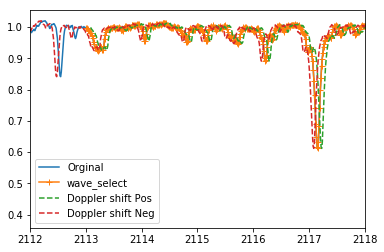

In [3]:
# Try to make a copy of a spectrum
HD30501_1_copy = copy.copy(HD30501_1)

# Test slice and doppler shift
plt.figure()
plt.plot(HD30501_1.xaxis, HD30501_1.flux, label="Orginal")
HD30501_1.wav_select(2113,2120)
plt.plot(HD30501_1.xaxis, HD30501_1.flux, "+-",label="wave_select")
RV = 10  # km/s
#nflux, wlprime = pyasl.dopplerShift(HD30501_1.xaxis, HD30501_1.flux, RV)
HD30501_1.doppler_shift(RV)    
plt.plot(HD30501_1.xaxis, HD30501_1.flux, "--", label="Doppler shift Pos")
HD30501_1_copy.doppler_shift(-RV)    
plt.plot(HD30501_1_copy.xaxis, HD30501_1_copy.flux, "--", label="Doppler shift Neg")
#plt.plt(wlprime, HD30501_1.flux, "PyAstronomy Doopler")
#plt.axis.xaxis.
plt.xlim([2112,2118])
plt.legend()
plt.show()


[ 51.2 106.7 182.2 277.7 393.2 528.7]


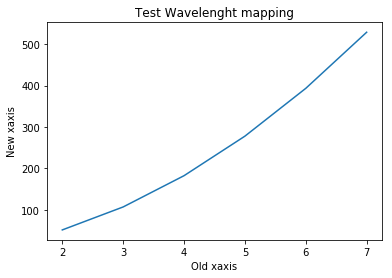

In [4]:
# Test Calibration polynomial
orginal_axis = [2,3,4,5,6,7]
spec = Spectrum(xaxis=orginal_axis, calibrated=False)
spec.calibrate_with([10, 5.5, 0.2])
print(spec.xaxis)

plt.plot(orginal_axis, spec.xaxis)
plt.title("Test Wavelenght mapping")
plt.xlabel("Old xaxis")
plt.ylabel("New xaxis")
plt.show()


# Testing Interpolation
Looks to be working ok

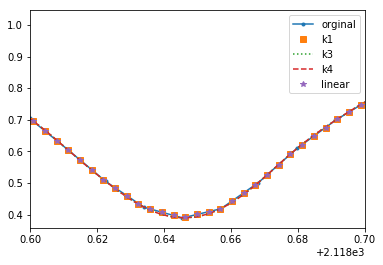

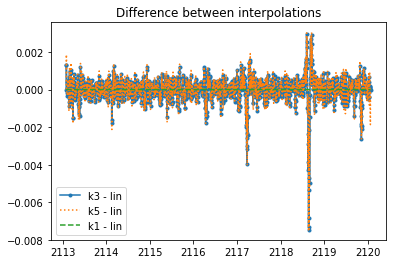

In [5]:
HD30501_1_k3 = copy.copy(HD30501_1)
HD30501_1_k1 = copy.copy(HD30501_1)
HD30501_1_k5 = copy.copy(HD30501_1)
HD30501_1_linear = copy.copy(HD30501_1)
HD30501_1_k3.spline_interpolate_to(np.linspace(np.min(HD30501_1.xaxis), np.max(HD30501_1.xaxis), 2000), k=3)
HD30501_1_k1.spline_interpolate_to(np.linspace(np.min(HD30501_1.xaxis), np.max(HD30501_1.xaxis), 2000), k=1)
HD30501_1_k5.spline_interpolate_to(np.linspace(np.min(HD30501_1.xaxis), np.max(HD30501_1.xaxis), 2000), k=5)
HD30501_1_linear.interpolate1d_to(np.linspace(np.min(HD30501_1.xaxis), np.max(HD30501_1.xaxis), 2000), kind='linear')

plt.figure()
plt.plot(HD30501_1.xaxis, HD30501_1.flux, '.-', label='orginal')
plt.plot(HD30501_1_k1.xaxis, HD30501_1_k1.flux, 's', label='k1')
plt.plot(HD30501_1_k3.xaxis, HD30501_1_k3.flux, ':', label='k3')
plt.plot(HD30501_1_k5.xaxis, HD30501_1_k5.flux, '--', label='k4')
plt.plot(HD30501_1_linear.xaxis, HD30501_1_linear.flux, '*', label='linear')
plt.xlim([2118.6,2118.7])
plt.legend(loc=0)
plt.show()

# Plot difference between llinear and default (cubic)
Diff_k1 =  HD30501_1_k1 - HD30501_1_linear   # use overloaded operators
Diff_k3 =  HD30501_1_k3 - HD30501_1_linear   # use overloaded operators
Diff_k5 =  HD30501_1_k5 - HD30501_1_linear   # use overloaded operators

plt.figure()
plt.plot(HD30501_1_k3.xaxis, Diff_k3.flux, '.-', label='k3 - lin')
plt.plot(HD30501_1_k5.xaxis, Diff_k5.flux, ':', label='k5 - lin')
plt.plot(HD30501_1_k1.xaxis, Diff_k1.flux, '--', label='k1 - lin')
plt.title("Difference between interpolations")
plt.legend(loc=0)
plt.show()